#### MALDI-TOF ANALISIS CLP
##### 6) s_m43_d24_top15

##### s: Supervisado
##### m43:  Utiliza 43 muestras
##### d24: Utiliza los días 2 y 4

##### Autor: Bioing. Facundo Urteaga (IBB-CONICET)

In [43]:
# Carga de Librerías

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística

In [46]:
# Carga de datos

df_top30_107_d24 = pd.read_csv('Data/top30_107_d24.csv')
df_top30_107_dico_d24 = pd.read_csv('Data/top30_107_dico_d24.csv')
metadata_107 = pd.read_csv('Data/metadata_107.csv')

In [47]:
df_top30_107_d24["etiqueta"] = metadata_107["factor1"]
df_top30_107_dico_d24["etiqueta"] = metadata_107["factor1"]

1) Regresión Logística

In [69]:
X = df_top30_107_d24.iloc[:,1:31]
y = df_top30_107_d24.iloc[:,31]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalizado = scaler.fit_transform(X) # Se puede probar otra normalización

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.4, random_state=0)
print(f"""X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}""")

X_train: (64, 30)
y_train: (64,)

X_test: (43, 30)
y_test: (43,)


In [75]:
# Instanciamos y ajustamos el modelo de regresión logística
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [76]:
pred = logistic_reg.predict(X_test)

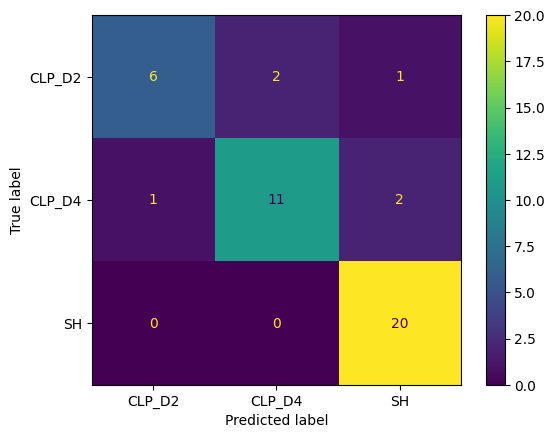

86.04651162790698


In [77]:
# Evaluación del modelo

# ignorar las advertencias de FutureWarning.
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, pred, labels=logistic_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

print(accuracy_score(y_test,pred)*100)

2) Random Forest